In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### a bit more cleaning (note: most screening in Pete_housing notebook)

In [4]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [5]:
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')

df.shape

(21597, 21)

In [6]:
df[['sqft_basement']] = df[['sqft_basement']].apply(pd.to_numeric)

In [7]:
df['area_basement'] = df['sqft_living']-df['sqft_above']

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


### Model 1: start w/ simple model at first for baseline

In [146]:
#set X & y variables
X = df.drop(['price'], axis = 1)
y = df['price']

In [147]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

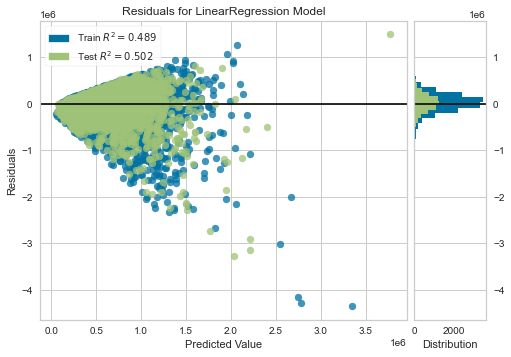

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [148]:
#run simple model w/ best predictor (sqft_living)
model_1_train = X_train[['sqft_living']] 
model_1_test = X_test[['sqft_living']]
model1 = LinearRegression()
model1.fit(model_1_train, y_train)

# Instantiate the visualizer
visualizer = ResidualsPlot(model1)
visualizer.fit(model_1_train, y_train)  # Fit the training data to the visualizer
visualizer.score(model_1_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [149]:
#interpret the error & fit of the model
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)

r_sq = model1.score(model_1_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
#intercept: 5.633333333333329
print('slope:', model1.coef_)
model_info = pd.DataFrame([('intercept', model1.intercept_)] + list(zip(model_1_train.columns, model1.coef_)), columns=['feature', 'weight'])
print(model_info)

train error 262419.7884333472
test error 259878.49234916252
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
slope: [281.86285286]
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


In [150]:
type(train_preds)

numpy.ndarray

In [151]:
train_preds

array([ 416569.06631542,  440245.54595576, 1111079.13576527, ...,
        654461.31413022,  282402.34835352,  319044.51922546])

In [163]:
X_train['price'] = y
X_train['resid'] = np.abs(y_train-train_preds)
X_train.loc[X_train['resid'] > 3000000]

<ipython-input-163-d93728ddafa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = y
<ipython-input-163-d93728ddafa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['resid'] = np.abs(y_train-train_preds)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement,resid,price
7245,6762700020,10/13/2014,6,8.00,12050,27600,2.5,0.0,3.0,4,...,1910,1987.0,98102,47.6298,-122.323,3940,8800,3480,4.350930e+06,7700000.0
3910,9808700762,6/11/2014,5,4.50,10040,37325,2.0,1.0,2.0,3,...,1940,2001.0,98004,47.6500,-122.214,3930,25449,2360,4.277474e+06,7060000.0
9245,9208900037,9/19/2014,6,7.75,9890,31374,2.0,0.0,4.0,3,...,2001,0.0,98039,47.6305,-122.240,4540,42730,1030,4.149754e+06,6890000.0
4407,2470100110,8/4/2014,5,5.75,9200,35069,2.0,0.0,0.0,3,...,2001,NaN,98039,47.6289,-122.233,3560,24345,3000,3.024239e+06,5570000.0


#### the model seems balanced, but produces a pretty poor fit 

In [13]:
#options: scaling, binning & encoding, polynomial model

In [14]:
#need to make a copy of the original then do train_test_split on it & continue with below

### copy dataset & prepare for other models

In [15]:
df_2 = df.copy()
df_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [99]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

In [100]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [101]:
#set predictors by dropping these variables
# X_train_pared = X_train.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)
# X_test_pared = X_test.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)


In [102]:
X_train_pared =X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]
X_test_pared = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]


In [20]:
print(f"X_train_pared is this big: {X_train_pared.shape}")
print(f"X_test_pared is this big: {X_test_pared.shape}")
print(f"y_train is this big: {y_train.shape}")
print(f"y_test is this big: {y_test.shape}")

X_train_pared is this big: (15117, 13)
X_test_pared is this big: (6480, 13)
y_train is this big: (15117,)
y_test is this big: (6480,)


### function for running models (code modified from Joel)

In [72]:
#this code is heavily borrowed from Joel Collins' solution for the Kaggle exercise
#input for model is previously calculated X_train, etc. data AND list of features from X_train
#to use the model, only change the features & rely on former X_train, etc.
def mrmodel(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)
    
    # return results
    difference = test_error - train_error
    print('train error', train_error)
    print('test error', test_error)
    print(f'difference: {difference}')

    r_sq = model.score(model_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    #intercept: 5.633333333333329
    model_info = pd.DataFrame([('intercept', model.intercept_)] + list(zip(model_train.columns, model.coef_)), columns=['feature', 'weight'])
    
    print(model_info)
    return model, model_train, model_test
    

### functions for visualizing performance of models

In [73]:
def residualizer(model, X_train, X_test, y_train, y_test):
    # this requires the yellowbrick api, which is called by...
    # from yellowbrick.regressor import ResidualsPlot
    # Instantiate the visualizer
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    return visualizer.show()                 # Finalize and render the figure

In [74]:
def plot_bins(model, X, y, bins=10, title='binned error'):
    q=pd.qcut(y, bins) #magical pandas function, makes quantiles (10 in this case)
    frame=pd.DataFrame(q) #takes cuts into a df so you can do groupby later
    frame['error']=model.predict(X)-y #estimates error
    frame.columns = ['bins', 'errors'] #reset column names
    avg=frame.groupby('bins').mean()
    avg['std']=frame.groupby('bins').std().iloc[:,0]
    avg.rename(columns={'bins':'mean'}, inplace=True)
    avg.plot(kind='bar', figsize=(15,6), title=title)
    
    

### running model 1 w/ functions

In [166]:
#run Joel's function ("mrmodel"): needs specified list of features and X_train, X_test, etc. specified in previous step 
model_features = ['sqft_living']
model_1_results, model_train, model_test = mrmodel(X_train, X_test, y_train, y_test, model_features)
#residualizer(model_1_results, X_train, X_test, y_train, y_test)

train error 262419.7884333472
test error 259878.49234916252
difference: -2541.2960841846652
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


In [167]:
model

<function __main__.model(X_train, X_test, y_train, y_test, features)>

In [168]:
model_1_results

LinearRegression()

In [169]:
#run plot_bins function: needs name of model output and values specified by running the model, 
# e.g., (model6, X_test[model_features], y_test)
plot_bins(model, X_test[model_features], y_test)

AttributeError: 'function' object has no attribute 'predict'

### model2: all numerical values unscaled

In [39]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']
model_2_results = mrmodel(X_train, X_test, y_train, y_test, model_features)
model_2_results

train error 226809.3163724381
test error 225347.17138654357
difference: -1462.144985894527
coefficient of determination: 0.6180358986328702
intercept: -3908662.141204477


LinearRegression()

In [ ]:
#run full model w/ all predictors
#update with new model that includes the updated array of dropped X values
# model2 = LinearRegression()
# model2.fit(X_train_pared, y_train)

### save this code for visualizing model output

In [ ]:
#build on this by adding model performance across quantiles of price data using pd.qcut
# model_info = pd.DataFrame([('intercept', model2.intercept_)] + list(zip(X_train_pared.columns, model2.coef_)), columns=['feature', 'weight'])
# plt.figure(figsize=(15,6))
# plt.bar(model_info.feature[1:], model_info.weight[1:])
# model_info

In [ ]:
#interpret the error & fit of the model
# train_preds = model2.predict(X_train_pared)
# test_preds = model2.predict(X_test_pared)

# train_error = mean_squared_error(y_train, train_preds, squared=False)
# test_error = mean_squared_error(y_test, test_preds, squared=False)
# print('train error', train_error)
# print('test error', test_error)

# r_sq = model2.score(X_train_pared, y_train)
# print('coefficient of determination:', r_sq)
# print('intercept:', model2.intercept_)
# intercept: 5.633333333333329
# print('slopes:', model2.coef_)
# #coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model2.coef_))], axis = 1)
# print(coefficients)

#### Model 3: run model 2 scaled

In [47]:
#scale training data
scaler = RobustScaler() #there are other options
scaler.fit(X_train_pared) #do this in first step w/ only train data
X_train_scaled = scaler.transform(X_train_pared) 

In [48]:
# Scale the test set, with same scalar
X_test_scaled = scaler.transform(X_test_pared)

In [52]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']

model_3_results = mrmodel(X_train, X_test, y_train, y_test, model_features)
model_3_results

train error 226809.3163724381
test error 225347.17138654357
difference: -1462.144985894527
coefficient of determination: 0.6180358986328702
intercept: -3908662.141204477


LinearRegression()

In [ ]:
#run full model w/ all predictors scaled
# model3 = LinearRegression()
# model3.fit(X_train_scaled, y_train)

In [ ]:
#interpret the error & fit of the model
# train_preds = model3.predict(X_train_scaled)
# test_preds = model3.predict(X_test_scaled)

# train_error = mean_squared_error(y_train, train_preds, squared=False)
# test_error = mean_squared_error(y_test, test_preds, squared=False)
# print('train error', train_error)
# print('test error', test_error)

# r_sq = model3.score(X_train_scaled, y_train)
# print('coefficient of determination:', r_sq)
# print('intercept:', model3.intercept_)
# intercept: 5.633333333333329
# print('slopes:', model3.coef_)

### Model4: re-run model 3 w/ log price

In [ ]:
df_3 = df_2.copy()
df_3.head()

In [ ]:
df_3['log_price'] = np.log(df_3['price'])

In [ ]:
#set X & y variables
X = df_3.drop(['price', 'log_price'], axis = 1)
y = df_3['log_price']

In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [ ]:
X_train_4 =X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]
X_test_4 = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]

In [ ]:
print(f"X_train_4 is this big: {X_train_4.shape}")
print(f"X_test_4 is this big: {X_test_4.shape}")
print(f"y_train is this big: {y_train.shape}")
print(f"y_test is this big: {y_test.shape}")

In [ ]:
#run full model w/ all predictors
#update with new model that includes the updated array of dropped X values
model4 = LinearRegression()
model4.fit(X_train_4, y_train)

In [ ]:
#interpret the error & fit of the model
train_preds = model4.predict(X_train_4)
test_preds = model4.predict(X_test_4)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)

r_sq = model4.score(X_train_4, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model4.intercept_)
#intercept: 5.633333333333329
print('slopes:', model4.coef_)

1. Find the difference between true y and predicted y
2. Plot predicted y on the x axis and error on y axis (scatter plot)

### model5: simplified model 3 w/ fewer features

In [41]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode']

model_5_results = mrmodel(X_train, X_test, y_train, y_test, model_features)
model_5_results

train error 227518.65418879347
test error 226215.79849525375
difference: -1302.855693539721
coefficient of determination: 0.6156430052027546
intercept: -3600607.543274485


LinearRegression()

#### this more simple model results in poorer performance

### Model6: adding new interaction features that Emma identified among all possible 2-way combinations

In [77]:
#new df to work with given new features
df_3 = df.copy()

In [81]:
df_3['living*bath'] = df_3['sqft_living']*df_3['bathrooms']
df_3['living*grade'] = df_3['sqft_living']*df_3['grade']
df_3['grade*bath'] = df_3['grade']*df_3['bathrooms']
df_3.view = df_3.view.replace(np.nan, 0)
df_3.waterfront = df_3.waterfront.replace(np.nan, 0)
#df_3.head()

In [79]:
#set X & y variables
X = df_3.drop(['price'], axis = 1)
y = df_3['price']

In [80]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [82]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement', 'grade*bath', 
        'living*grade', 'living*bath', 'lat', 'waterfront', 'long', 'view']

model_6_results = mrmodel(X_train, X_test, y_train, y_test, model_features)
model_6_results

train error 187242.47643603454
test error 188290.74265648978
difference: 1048.2662204552325
coefficient of determination: 0.7396788095674223
intercept: 8900706.742211593
          feature        weight
0       intercept  8.900707e+06
1        bedrooms -1.212653e+04
2       bathrooms -7.158496e+03
3     sqft_living -1.613017e+02
4        sqft_lot  4.212476e-02
5          floors  4.305385e+04
6       condition  3.462466e+04
7           grade  1.768478e+04
8      sqft_above -8.927252e+01
9        yr_built -2.276464e+03
10        zipcode -5.562567e+02
11  sqft_living15  3.663995e+01
12     sqft_lot15 -3.275387e-01
13  area_basement -7.202915e+01
14     grade*bath -1.905096e+02
15   living*grade  3.630921e+01
16    living*bath  2.587920e+01
17            lat  5.962597e+05
18     waterfront  5.711090e+05
19           long -1.780575e+05
20           view  4.819872e+04


(LinearRegression(),
        bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
 6871          3       2.25         1646     12414     2.0          3      7   
 14036         3       1.75         1730     11325     1.0          5      7   
 14885         4       5.00         4110     43560     2.0          4     11   
 20431         3       1.50         1010      1546     2.0          3      8   
 17834         3       2.25         2440      8378     1.0          3      7   
 ...         ...        ...          ...       ...     ...        ...    ...   
 16347         3       1.50         1460     11100     1.0          3      7   
 20318         3       2.50         1950      4345     2.0          3      7   
 2669          6       1.75         2490      8732     1.5          4      8   
 17536         3       1.50         1170      4950     1.0          4      7   
 6201          2       1.00         1300      6731     1.0          3      7   
 
        sqft_abov

In [43]:
def plot_bins(model, X, y, bins=10, title='binned error'):
    q=pd.qcut(y, bins) #magical pandas function, makes quantiles (10 in this case)
    frame=pd.DataFrame(q) #takes cuts into a df so you can do groupby later
    frame['error']=model.predict(X)-y #estimates error
    frame.columns = ['bins', 'errors'] #reset column names
#     sdev=frame.groupby('bins').std()
#     avg=frame.groupby('bins').mean() #gather all obs in each bin & take avg of them all
    avg=frame.groupby('bins').mean()
    avg['std']=frame.groupby('bins').std().iloc[:,0]
    avg.rename(columns={'bins':'mean'}, inplace=True)
    avg.plot(kind='bar', figsize=(15,6), title=title)
    
    

<function __main__.model(X_train, X_test, y_train, y_test, features)>

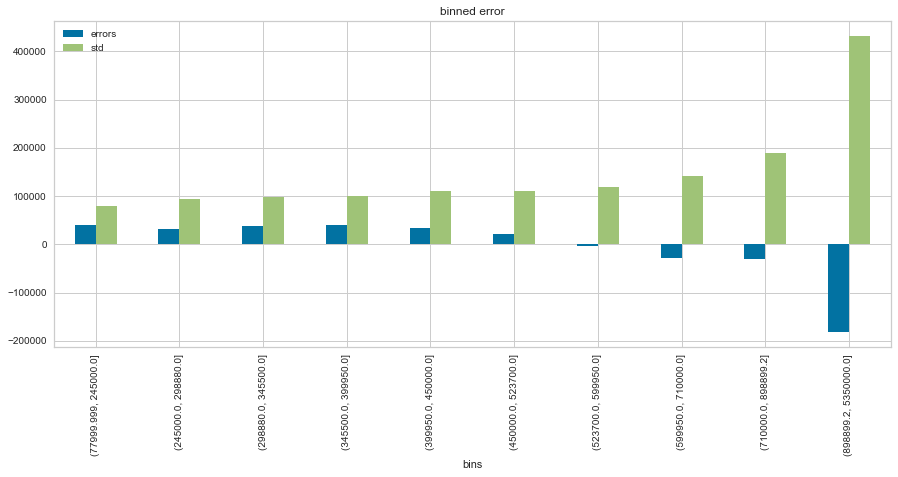

In [44]:
model6=LinearRegression()
model6.fit(X_train[model_features], y_train)
plot_bins(model6, X_test[model_features], y_test)

In [ ]:
#some possible options: 1) polynomial, 2) an if:then function w/in model to only apply predictors in particular ranges
# 3) bin zip codes into categories & do OneHotEncoding 4) look for feature engineering that would decrease error across
# lower cost houses 5) transformations of non-linear predictors 6) log transforming price & looking at performance across bins

### Model 7: polynomial model

In [56]:
df_3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'area_basement',
       'living*bath', 'living*grade', 'bath*bed'],
      dtype='object')

In [57]:
#make a new df to work with out of habit
df_4 = df_3.copy()
df_4 = df_4.drop(['id', 'date', 'yr_renovated'], axis=1)
#set X & y variables
X = df_4.drop(['price'], axis = 1)
y = df_4['price']

In [58]:
df_4.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
area_basement    0
living*bath      0
living*grade     0
bath*bed         0
dtype: int64

In [59]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [60]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)
# Fit and transform X_train
X_poly_fit = poly.fit(X_train)
X_poly_train = poly.transform(X_train)
    
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)
    
# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)
    
# Evaluate model performance on test data
r_sq = r2_score(y_test, y_pred)
    
# Transform the full data
X_poly = poly.transform(X)
    
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [65]:
#interpret the error & fit of the model
train_preds = reg_poly.predict(X_poly_train)
test_preds = reg_poly.predict(X_poly_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)
difference = test_error - train_error
print(f'difference: {difference}')

print('coefficient of determination:', r_sq)
print('intercept:', reg_poly.intercept_)
#intercept: 5.633333333333329
#print('slopes:', reg_poly.coef_)

train error 148347.68167451464
test error 167385.67758537212
difference: 19037.995910857484
coefficient of determination: 0.7933563600220527
intercept: 22040027262.940754


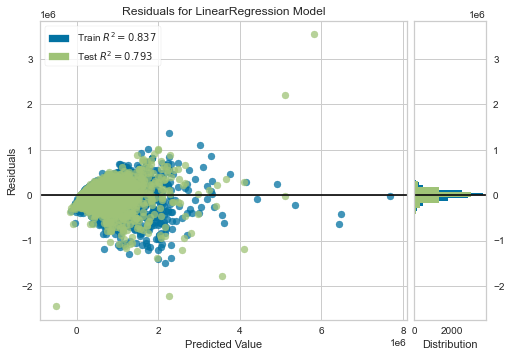

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
# Instantiate the visualizer
visualizer = ResidualsPlot(reg_poly)
visualizer.fit(X_poly_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_poly_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [165]:
X_train['price'] = y
X_train['resid'] = np.abs(y_train-train_preds)
X_train.loc[X_train['resid'] > 3000000]

<ipython-input-165-d93728ddafa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = y
<ipython-input-165-d93728ddafa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['resid'] = np.abs(y_train-train_preds)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement,resid,price
7245,6762700020,10/13/2014,6,8.00,12050,27600,2.5,0.0,3.0,4,...,1910,1987.0,98102,47.6298,-122.323,3940,8800,3480,4.350930e+06,7700000.0
3910,9808700762,6/11/2014,5,4.50,10040,37325,2.0,1.0,2.0,3,...,1940,2001.0,98004,47.6500,-122.214,3930,25449,2360,4.277474e+06,7060000.0
9245,9208900037,9/19/2014,6,7.75,9890,31374,2.0,0.0,4.0,3,...,2001,0.0,98039,47.6305,-122.240,4540,42730,1030,4.149754e+06,6890000.0
4407,2470100110,8/4/2014,5,5.75,9200,35069,2.0,0.0,0.0,3,...,2001,NaN,98039,47.6289,-122.233,3560,24345,3000,3.024239e+06,5570000.0


In [170]:
#dropping the crazy expensive houses
df_4.drop(index = [7245, 3910, 9245, 4407], inplace=True)

In [177]:
df_4.loc[df_4['price'] > 5000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,bath*bed
1162,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,...,1999,98033,47.6767,-122.211,3430,26788,2020,42052.5,96120,26.25
1313,5300000.0,6,6.00,7390,24829,2.0,1.0,0.0,4,12,...,1991,98040,47.5631,-122.210,4320,24619,2390,44340.0,88680,36.00
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,...,2009,98004,47.6232,-122.220,4600,21750,1280,40000.0,96000,25.00
